In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve
import matplotlib.pyplot as plt

In [45]:
#读取数据集并清洗
def process_data():
    data = pd.read_csv('bank-full.csv', delimiter=';')
    #数据清洗，删除空值
    data = data.dropna()
    #获取keys
    keys = data.keys()
    keys.drop(["day","month","pdays"])
    #将文本数据换为数字类别 , apply方法依次遍历data[keys]里面的列,并进行数字转换
    data = data[keys].apply(LabelEncoder().fit_transform) #LabelEncoder主要是将每一列的数据进行分类，例如分为5类，依次换为0-4，用数字代替
    X = data.iloc[:,:-1]#特征集
    y = data.iloc[:,-1]#标签集
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)#将整个数据集分为训练集和测试集,test_size=0.2测试集占20%
    return x_train,x_test,y_train,y_test

In [46]:
def GauNB(x_train,x_test,y_train,y_test):
    #建立贝叶斯分类器模型
    bayes = GaussianNB().fit(x_train,y_train)
    y_predict = bayes.predict(x_test)#将训练好的模型针对测试集进行计算，得出结果后要与实际结果进行比较计算准确率
    print("预测值：",y_predict[:20])
    print("实际值：",np.array(y_test[:20]).reshape(-1))
    score(y_test,y_predict)

In [50]:
#多项式朴素贝叶斯 （特征值不能为负）
def MulNB(x_train,x_test,y_train,y_test):
    mul = MultinomialNB().fit(x_train,y_train)
    y_predict = mul.predict(x_test)
    #评价指标
    score(y_test,y_predict)

In [47]:
#评价指标
def score(y_test,y_predict):
    print("准确率:",accuracy_score(y_predict,y_test))
    print("精确率:",precision_score(y_predict,y_test))
    print("召回率:",recall_score(y_predict,y_test))
    #ROC曲线
    fpr,tpr,thresholds = roc_curve(y_test,y_predict)
    fig = plt.figure(figsize = (10,6))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.plot(fpr,tpr,color="red")
    plt.show()

预测值： [0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1]
实际值： [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
准确率: 0.8335729293376092
精确率: 0.5051258154706431
召回率: 0.3575197889182058


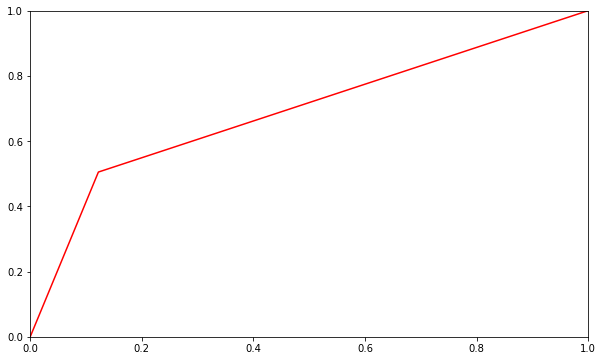

准确率: 0.6722326661506137
精确率: 0.65237651444548
召回率: 0.2127013065937405


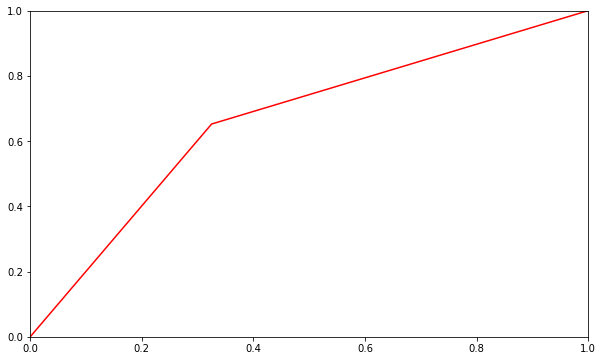

In [49]:
if __name__ == "__main__":
    #读取数据并处理数据
    x_train,x_test,y_train,y_test = process_data()
    GauNB(x_train,x_test,y_train,y_test)
    MulNB(x_train,x_test,y_train,y_test)